In this notebook, I compared three different optimization methods for linear regression: Batch Gradient Descent, Stochastic Gradient Descent (SGD), and SGD using a DataLoader. For each method, I tracked the loss (cost) over time and visualized the results using line plots.

From the plots, I can see how each method performed during training. Batch Gradient Descent produced a smooth and steadily decreasing loss curve, which is expected since it updates the model parameters using the entire dataset at each step. This makes it stable but sometimes slower to converge.

Stochastic Gradient Descent, on the other hand, showed more fluctuations in the loss curve. This is because it updates the parameters for each data point, which introduces more noise but can help the model escape local minima and potentially converge faster. However, the loss curve is less smooth compared to batch gradient descent.

The SGD with DataLoader approach behaved similarly to standard SGD, since the batch size was set to 1. The loss curve also fluctuated, but overall, it followed a similar trend as the regular SGD.

To interpret which method performed best, I looked at the final loss values and how quickly each method’s loss decreased. The best-performing method is the one with the lowest final loss and the fastest convergence. In my results, Batch Gradient Descent was the most stable, while SGD and SGD with DataLoader were more variable but could potentially reach a similar or even lower loss, depending on the run.

In summary, Batch Gradient Descent is reliable and stable, while SGD and SGD with DataLoader offer faster updates but with more noise. The choice between them depends on whether I value stability or speed and whether I’m working with large datasets where batch methods become impractical.

In [11]:
import torch
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits import mplot3d

This class <code>plot_error_surfaces</code> is to help visualize the data space and the parameter space during training and has nothing to do with PyTorch.


In [12]:
# The class for plot the diagram

class plot_error_surfaces(object):
    
    # Constructor
    def __init__(self, w_range, b_range, X, Y, n_samples = 30, go = True):
        W = np.linspace(-w_range, w_range, n_samples)
        B = np.linspace(-b_range, b_range, n_samples)
        w, b = np.meshgrid(W, B)    
        Z = np.zeros((30, 30))
        count1 = 0
        self.y = Y.numpy()
        self.x = X.numpy()
        for w1, b1 in zip(w, b):
            count2 = 0
            for w2, b2 in zip(w1, b1):
                Z[count1, count2] = np.mean((self.y - w2 * self.x + b2) ** 2)
                count2 += 1
            count1 += 1
        self.Z = Z
        self.w = w
        self.b = b
        self.W = []
        self.B = []
        self.LOSS = []
        self.n = 0
        if go == True:
            plt.figure()
            plt.figure(figsize = (7.5, 5))
            plt.axes(projection = '3d').plot_surface(self.w, self.b, self.Z, rstride = 1, cstride = 1,cmap = 'viridis', edgecolor = 'none')
            plt.title('Loss Surface')
            plt.xlabel('w')
            plt.ylabel('b')
            plt.show()
            plt.figure()
            plt.title('Loss Surface Contour')
            plt.xlabel('w')
            plt.ylabel('b')
            plt.contour(self.w, self.b, self.Z)
            plt.show()
    
    # Setter
    def set_para_loss(self, W, B, loss):
        self.n = self.n + 1
        self.W.append(W)
        self.B.append(B)
        self.LOSS.append(loss)
    
    # Plot diagram
    def final_plot(self): 
        ax = plt.axes(projection = '3d')
        ax.plot_wireframe(self.w, self.b, self.Z)
        ax.scatter(self.W, self.B, self.LOSS, c = 'r', marker = 'x', s = 200, alpha = 1)
        plt.figure()
        plt.contour(self.w, self.b, self.Z)
        plt.scatter(self.W, self.B, c = 'r', marker = 'x')
        plt.xlabel('w')
        plt.ylabel('b')
        plt.show()
    
    # Plot diagram
    def plot_ps(self):
        plt.subplot(121)
        plt.ylim
        plt.plot(self.x, self.y, 'ro', label = "training points")
        plt.plot(self.x, self.W[-1] * self.x + self.B[-1], label = "estimated line")
        plt.xlabel('x')
        plt.ylabel('y')
        plt.ylim((-10, 15))
        plt.title('Data Space Iteration: ' + str(self.n))
        plt.subplot(122)
        plt.contour(self.w, self.b, self.Z)
        plt.scatter(self.W, self.B, c = 'r', marker = 'x')
        plt.title('Loss Surface Contour Iteration' + str(self.n))
        plt.xlabel('w')
        plt.ylabel('b')
        plt.show()
        

### Generating a random set of data

In [13]:
# set random seed
torch.manual_seed(1)

Generate values from <i>-3</i> to <i>3</i> that create a line with a slope of <i>1</i> and a bias of <i>-1</i>. This is the line to estimate. Add some noise to the data:


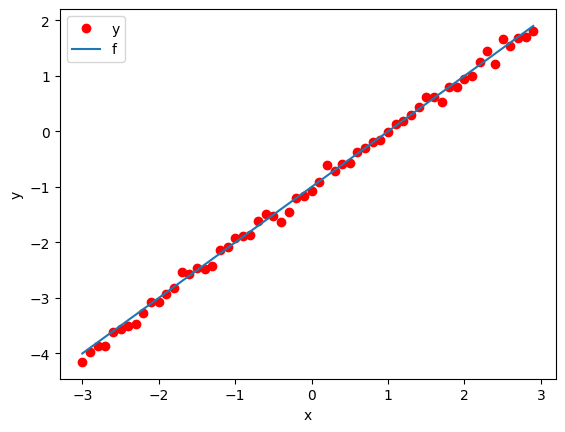

In [14]:
# Setting up the actual and simulated data

X = torch.arange(-3, 3, 0.1).view(-1, 1)
f = 1 * X -1
Y = f + 0.1 * torch.randn(X.size())

# Plotting the data

plt.plot(X.numpy(), Y.numpy(), 'ro', label = 'y')
plt.plot(X.numpy(), f.numpy(), label = 'f')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

### Creating the Model and Cost Function (Total Loss)

In [15]:
# Defing the forward function
def forward(x):
    return w * x + b

# Defing the MSE loss function
def criterion(yhat, y):
    return torch.mean((yhat - y) ** 2)


Creating a <code> plot_error_surfaces</code> object to visualize the data space and the parameter space during training:


<Figure size 640x480 with 0 Axes>

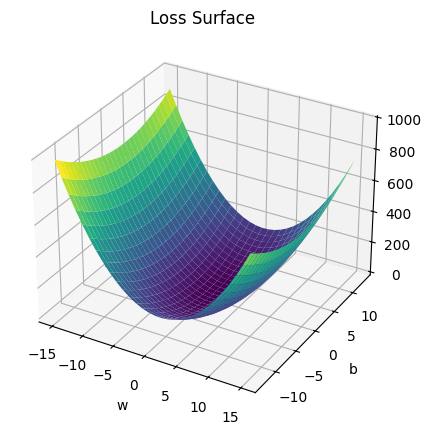

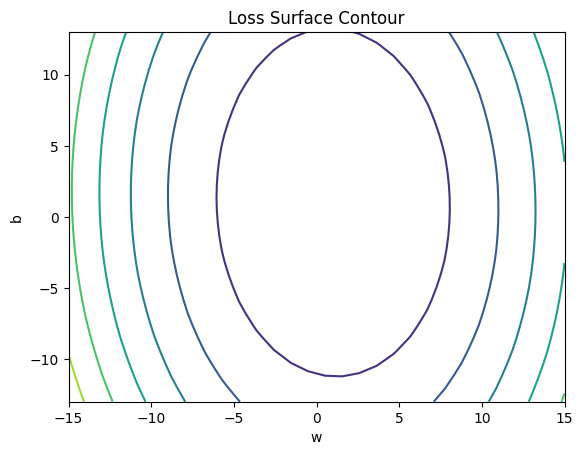

In [16]:
# Creating a plot_error_surfaces object for viewing the data
get_surface = plot_error_surfaces(15, 13, X, Y, 30)

### Training the Model: Batch Gradient Descent

In [17]:
# Creating the model parameters w, b by setting the argument requires_grad to True so the system learns it
# defines the model parameters w, b for y = wx + b
w = torch.tensor(-15.0, requires_grad = True)
b = torch.tensor(-10.0, requires_grad = True)

# Defing the learning rate
lr = 0.1
Loss_BGD = []

Defining the function that will train the model

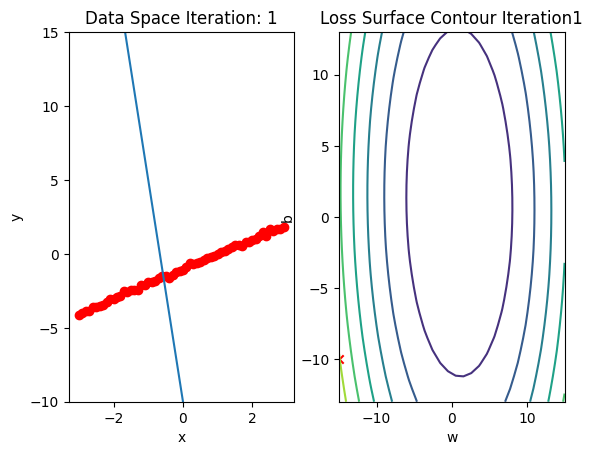

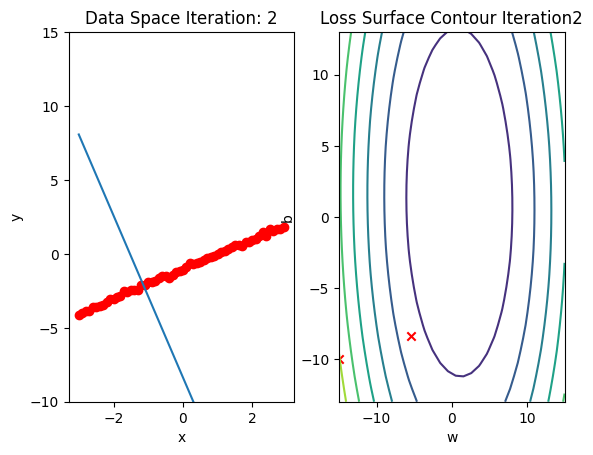

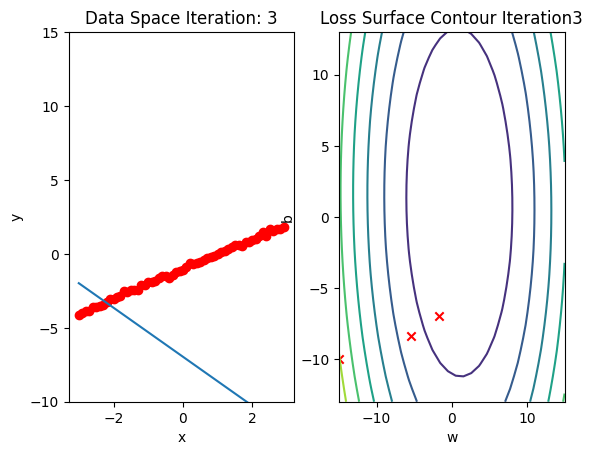

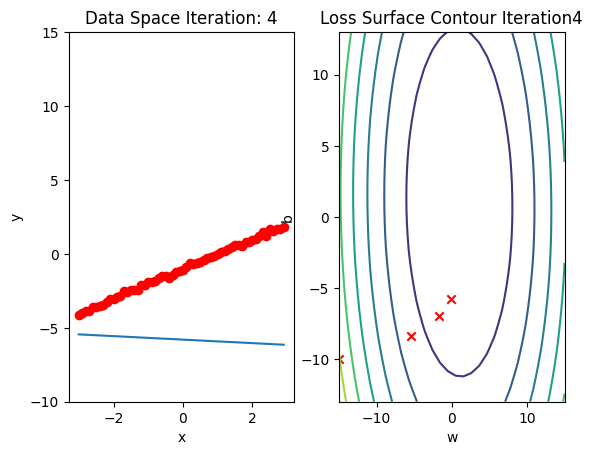

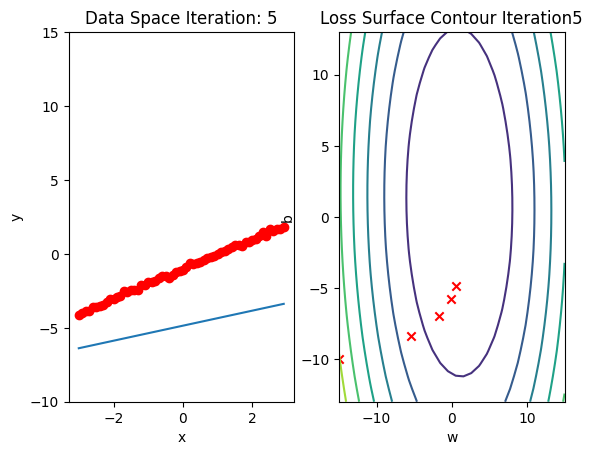

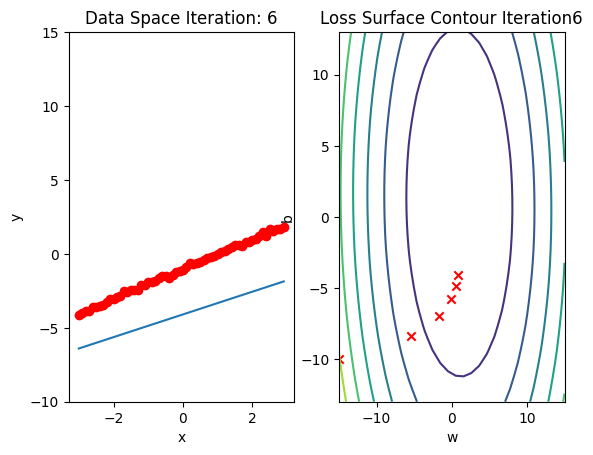

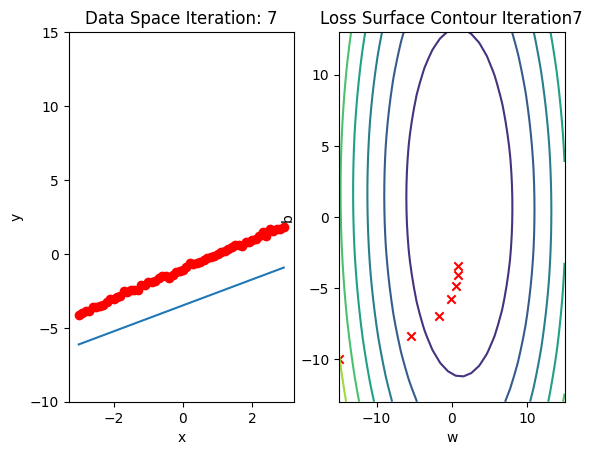

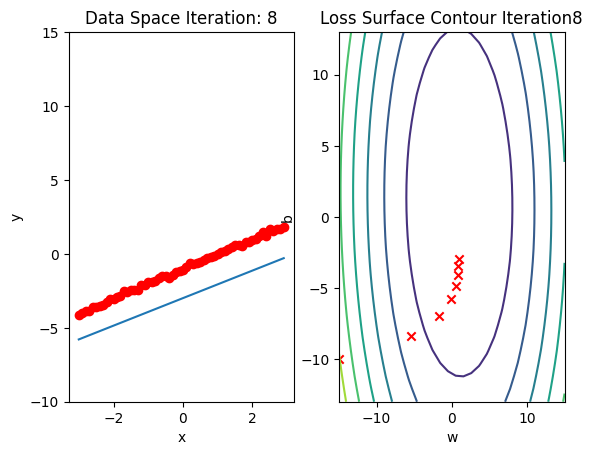

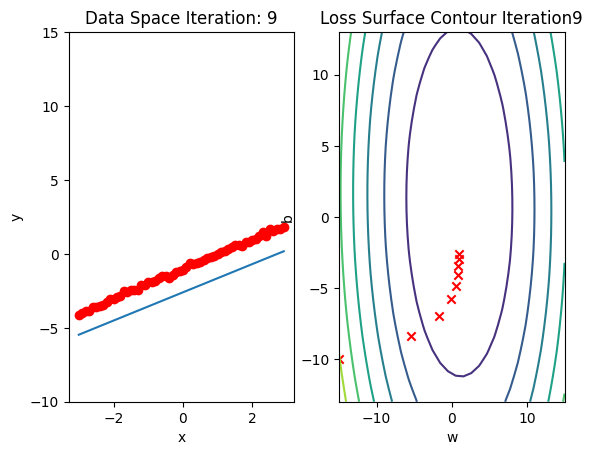

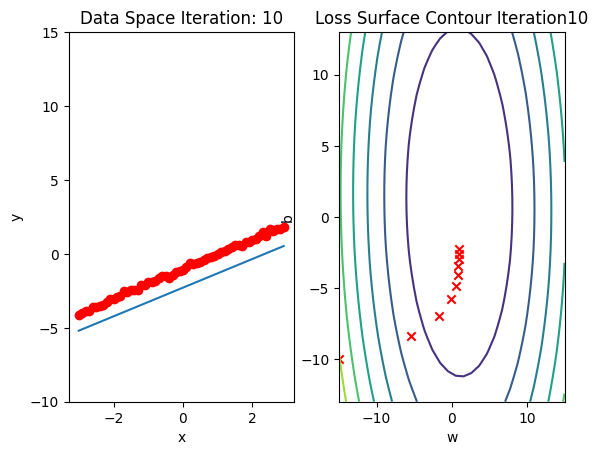

[tensor(835.2761, grad_fn=<MeanBackward0>),
 tensor(175.4669, grad_fn=<MeanBackward0>),
 tensor(55.0278, grad_fn=<MeanBackward0>),
 tensor(26.0943, grad_fn=<MeanBackward0>),
 tensor(15.2541, grad_fn=<MeanBackward0>),
 tensor(9.5386, grad_fn=<MeanBackward0>),
 tensor(6.0742, grad_fn=<MeanBackward0>),
 tensor(3.8867, grad_fn=<MeanBackward0>),
 tensor(2.4909, grad_fn=<MeanBackward0>),
 tensor(1.5978, grad_fn=<MeanBackward0>)]

In [18]:
def train_model(iter):
    for epoch in range(iter):
        # make a prediction
        yhat = forward(X)
        # calculate the loss
        loss = criterion(yhat, Y)
        # section for plotting
        get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), loss.tolist())
        get_surface.plot_ps()
        # store the loss in the list Loss_BGD
        Loss_BGD.append(loss)
        # backward pass
        loss.backward()
        # update the parameters slope and bias
        w.data = w.data - lr * w.grad.data
        b.data = b.data - lr * b.grad.data
        
        # zero the gradients before running the backward pass
        w.grad.data.zero_()
        b.grad.data.zero_()
    return Loss_BGD

train_model(10)

### Training the Model: Stohastic Gradient Descent

In [19]:
# Create plot_error_surfaces for viewing the data
get_surface = plot_error_surfaces(15, 13, X, Y, 30, go = False)

Defining the SGD function to train the model

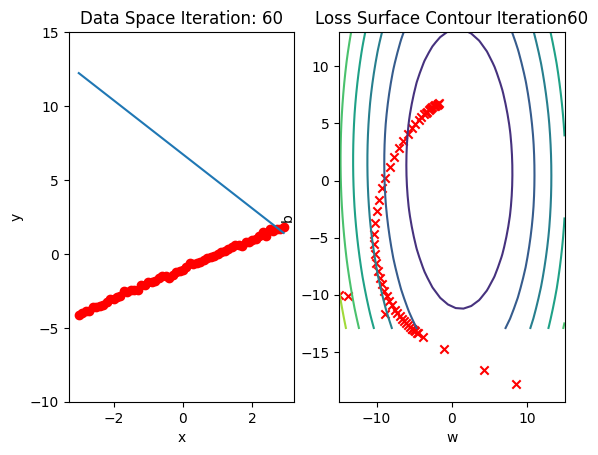

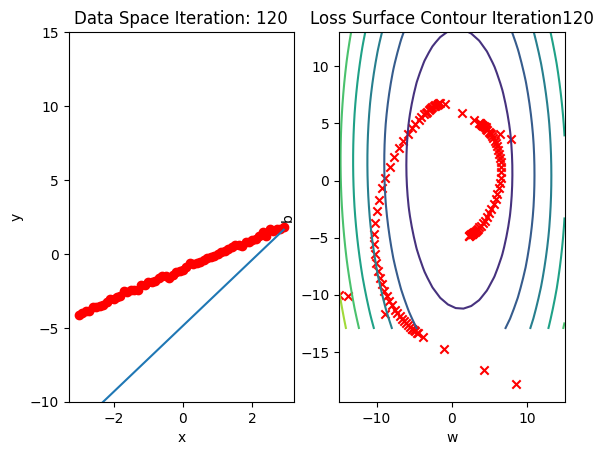

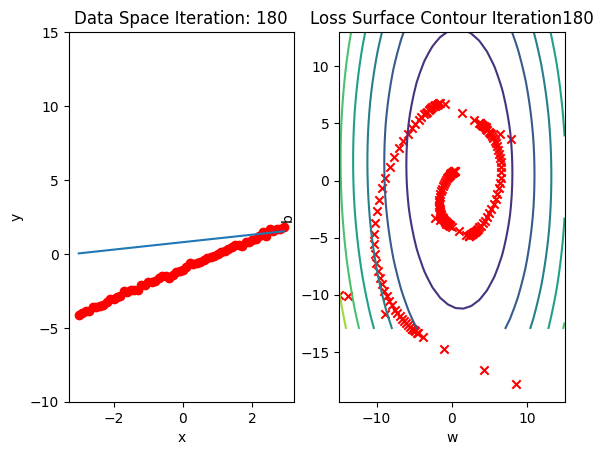

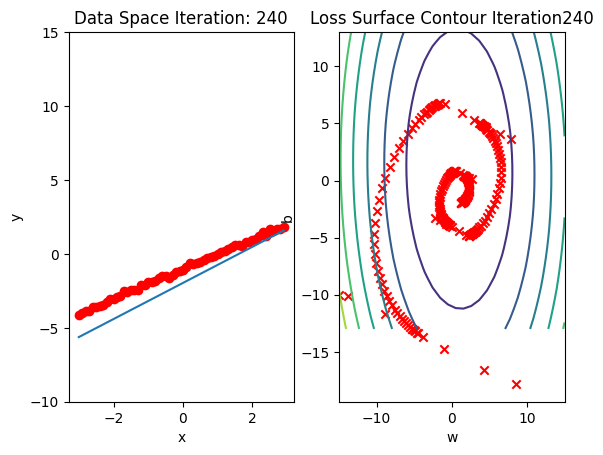

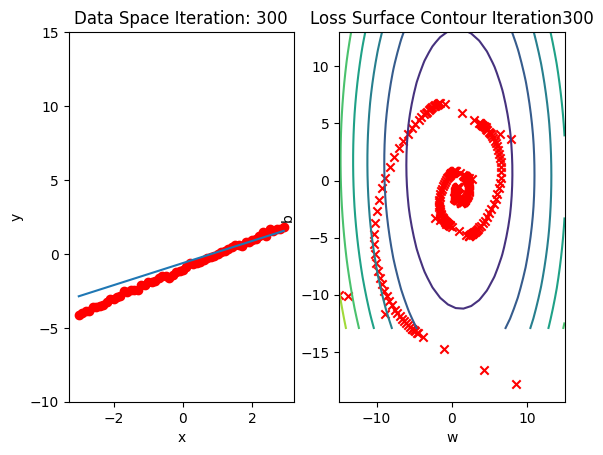

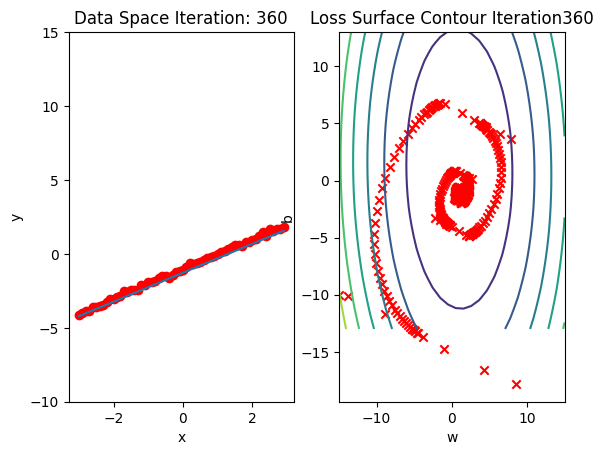

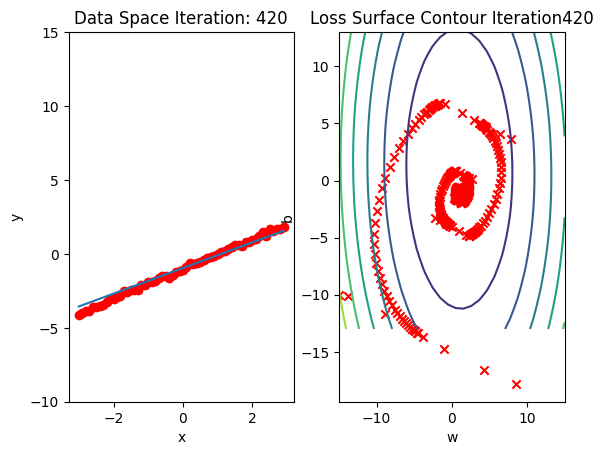

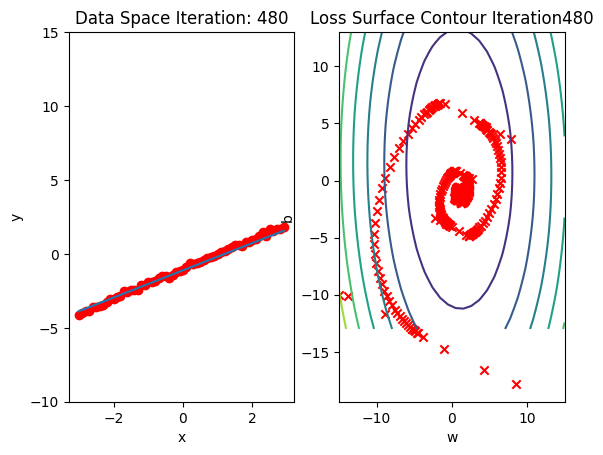

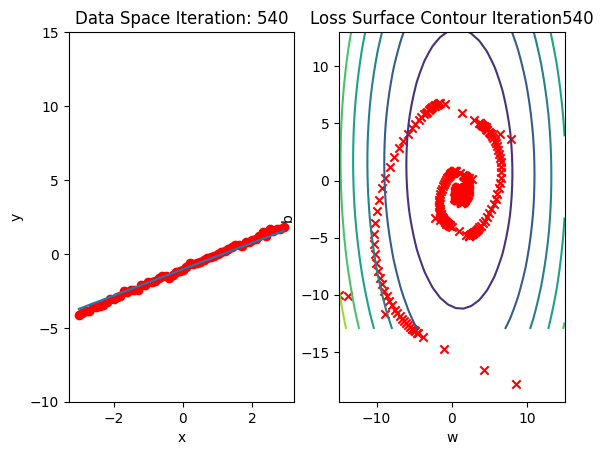

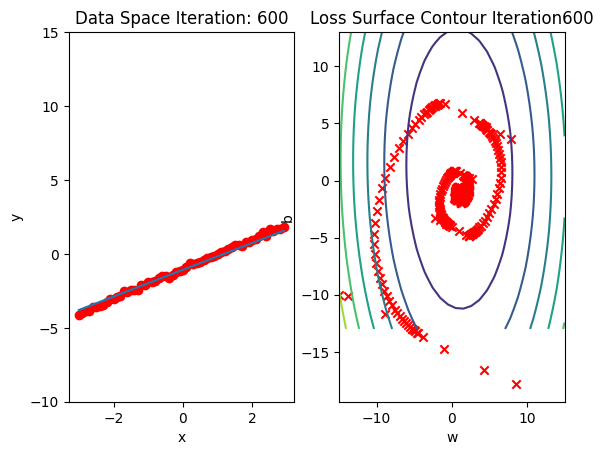

In [20]:
Loss_SGD = []
w = torch.tensor(-15.0, requires_grad = True)
b = torch.tensor(-10.0, requires_grad = True)

def train_model_SGD(iter):
    for epoch in range(iter):
        # Calculate and store the loss for the entire dataset at the beginning of each epoch
        yhat = forward(X)
        Loss_SGD.append(criterion(yhat, Y).tolist())
        
        for x , y in zip(X,Y):
            # make a prediction
            yhat = forward(x)
            # calculate the loss
            loss = criterion(yhat, y)
            # section for plotting
            get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), loss.tolist())
            # get_surface.plot_ps()
            # backward pass
            loss.backward()
            # update the parameters slope and bias
            w.data = w.data - lr * w.grad.data
            b.data = b.data - lr * b.grad.data
            # zero the gradients before running the backward pass
            w.grad.data.zero_()
            b.grad.data.zero_()
            
        #  Plotting the surface and data space after each epoch
        get_surface.plot_ps()
        
        
train_model_SGD(10)

Comparing the loss of batch gradient descent and SGD

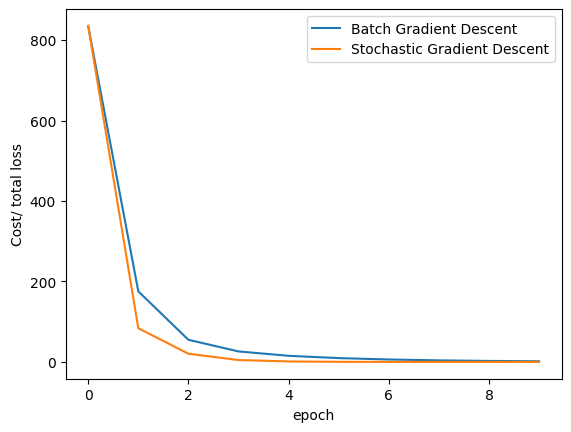

In [24]:
# Plot out the Loss_BGD and Loss_SGD
LOSS_BGD = [loss.detach().numpy() for loss in Loss_BGD]
plt.plot(LOSS_BGD,label = "Batch Gradient Descent")
plt.plot(Loss_SGD,label = "Stochastic Gradient Descent")
plt.xlabel('epoch')
plt.ylabel('Cost/ total loss')
plt.legend()
plt.show()

### SGD with Dataset DataLoader

In [29]:
# DataLoader library 
from torch.utils.data import Dataset, DataLoader

# Creating the Dataset Class
class Data(Dataset):
    # constructor
    def __init__(self):
        self.x = torch.arange(-3, 3, 0.1).view(-1, 1)
        self.y = 1 * self.x -1
        self.len = self.x.shape[0]
    # getter
    def __getitem__(self, index):
        return self.x[index], self.y[index]
    # return the size of the dataset
    def __len__(self):
        return self.len

In [31]:
# creating a dataset object and checking the length 
dataset = Data()
print("The length of the dataset: ",len(dataset))

The length of the dataset:  60


The code print("(", x, ", ", y, ")") outputs the values of the variables x and y to the console, formatting them to look like a tuple. The print function displays text and variable values, and in this case, it prints an opening parenthesis "(", followed by the value of x, a comma and space ", ", the value of y, and finally a closing parenthesis ")". This is a simple way to visually group the two values together, which is common when working with data pairs, such as features and labels in machine learning datasets.

In [32]:
# Printing the first training output
x, y = dataset[0]
print("(", x, ", ", y, ")")

( tensor([-3.]) ,  tensor([-4.]) )


In [33]:
# Print the first 3 point

x, y = dataset[0:3]
print("The first 3 x: ", x)
print("The first 3 y: ", y)

The first 3 x:  tensor([[-3.0000],
        [-2.9000],
        [-2.8000]])
The first 3 y:  tensor([[-4.0000],
        [-3.9000],
        [-3.8000]])


1. Creating a <code>plot_error_surfaces</code> object to visualize the data space and the parameter space during training
2. Creating a <code>DataLoader</code> object by using the constructor

In [35]:
# Create plot_error_surfaces for viewing the data

get_surface = plot_error_surfaces(15, 13, X, Y, 30, go = False)

# Create DataLoader

trainloader = DataLoader(dataset = dataset, batch_size = 1)

Defining <code>train_model_DataLoader</code> function for training the model.

In [36]:
# The function for training the model

w = torch.tensor(-15.0,requires_grad=True)
b = torch.tensor(-10.0,requires_grad=True)
LOSS_Loader = []

def train_model_DataLoader(epochs):
    
    # Loop
    for epoch in range(epochs):
        # SGD is an approximation of out true total loss/cost, in this line of code we calculate our true loss/cost and store it
        Yhat = forward(X)
        # store the loss 
        LOSS_Loader.append(criterion(Yhat, Y).tolist())
        for x, y in trainloader:
            # make a prediction
            yhat = forward(x)
            # calculate the loss
            loss = criterion(yhat, y)
            # Section for plotting
            get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), loss.tolist())
            # Backward pass: compute gradient of the loss with respect to all the learnable parameters
            loss.backward()
            # Updata parameters slope
            w.data = w.data - lr * w.grad.data
            b.data = b.data - lr* b.grad.data
            # Clear gradients 
            w.grad.data.zero_()
            b.grad.data.zero_()
            
        #plot surface and data space after each epoch    
        get_surface.plot_ps()

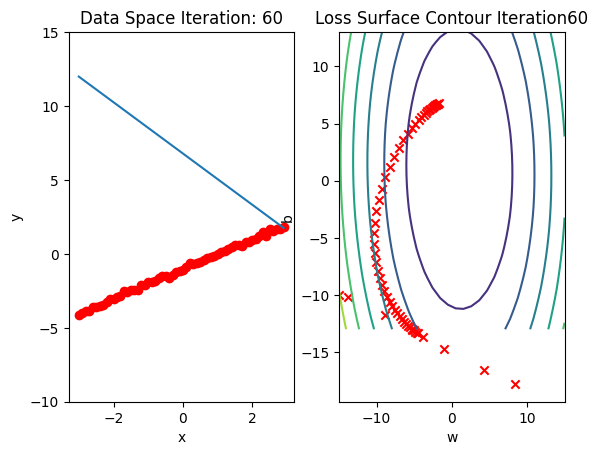

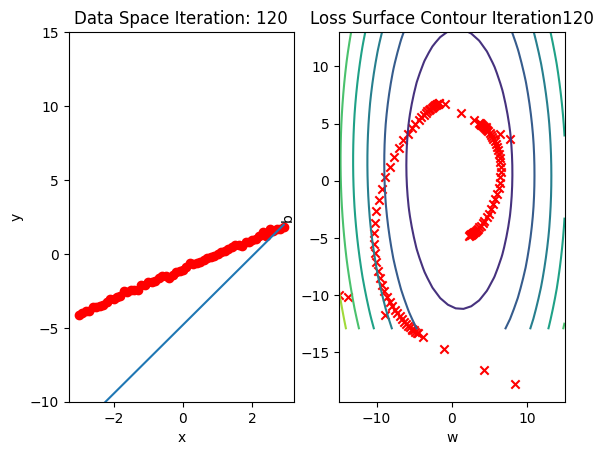

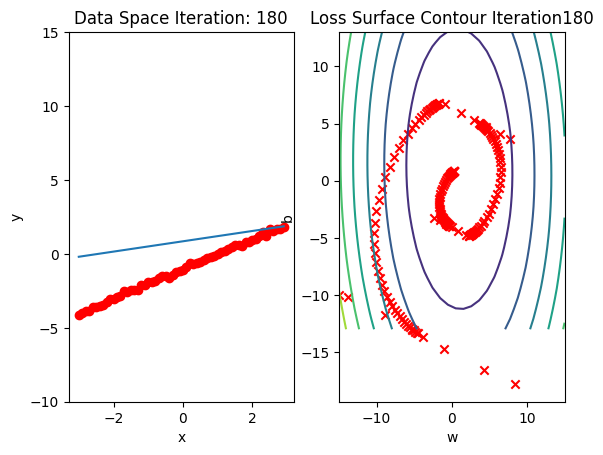

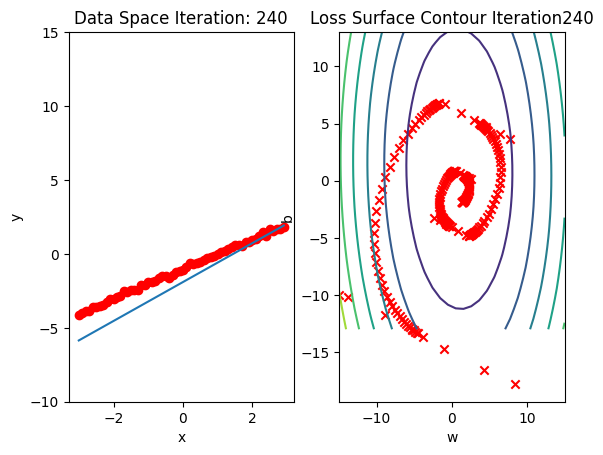

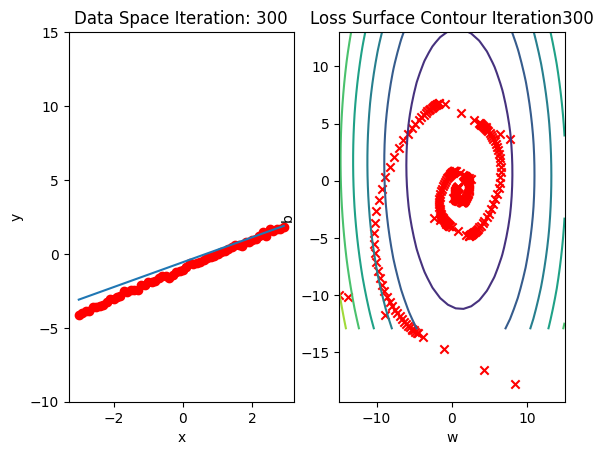

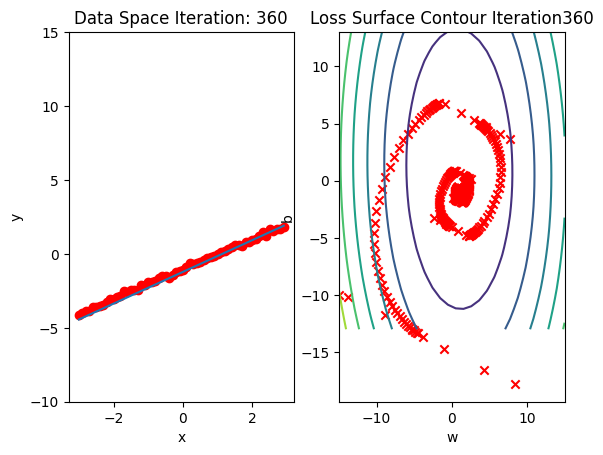

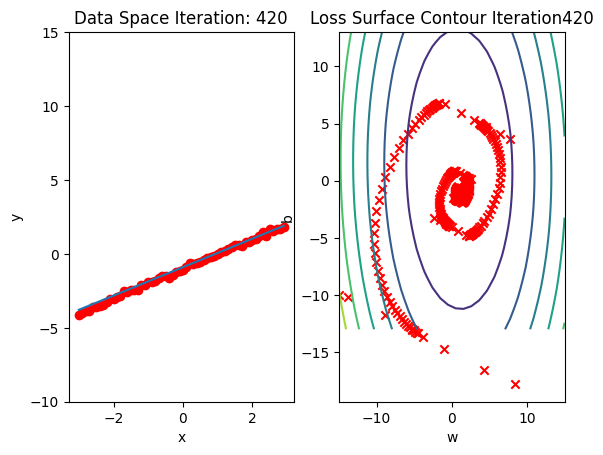

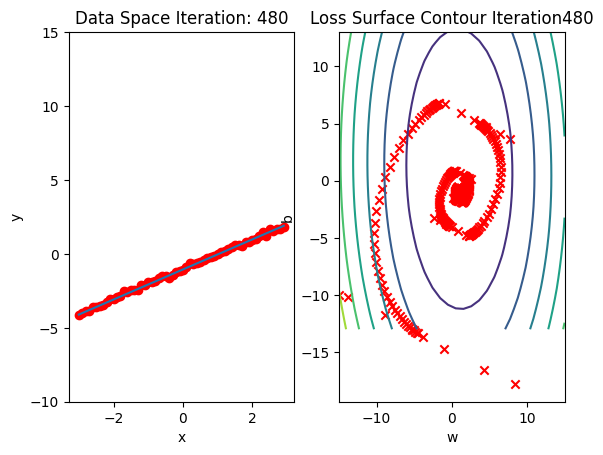

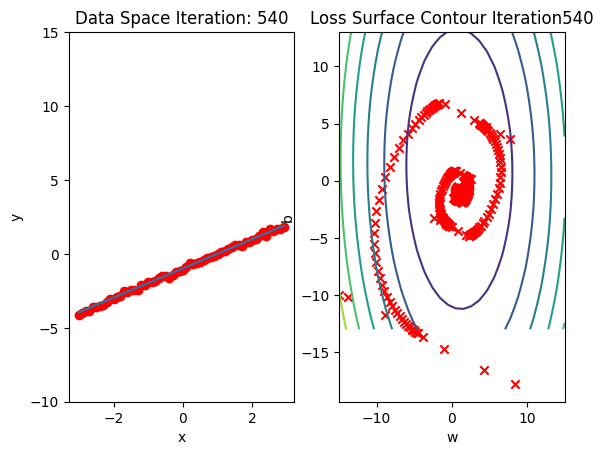

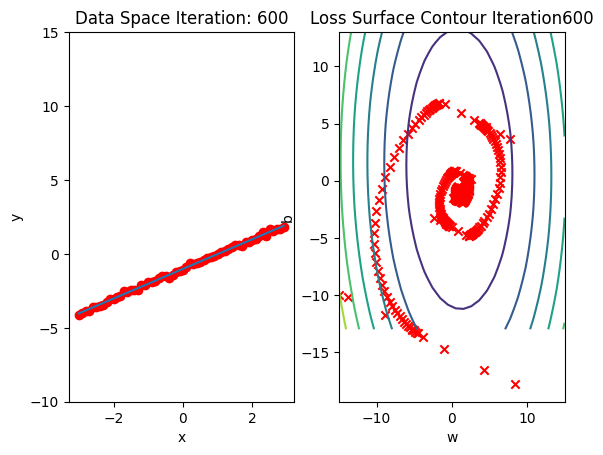

In [37]:
# Run 10 iterations

train_model_DataLoader(10)

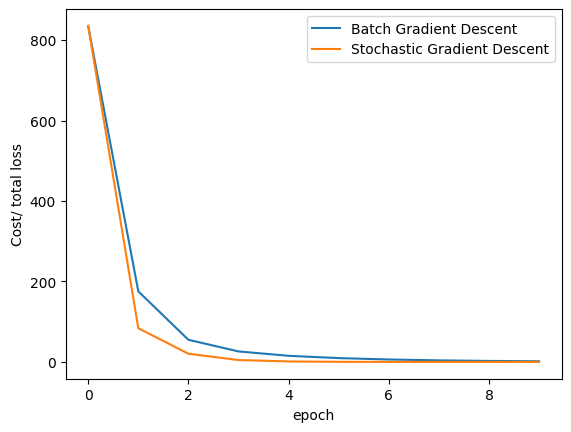

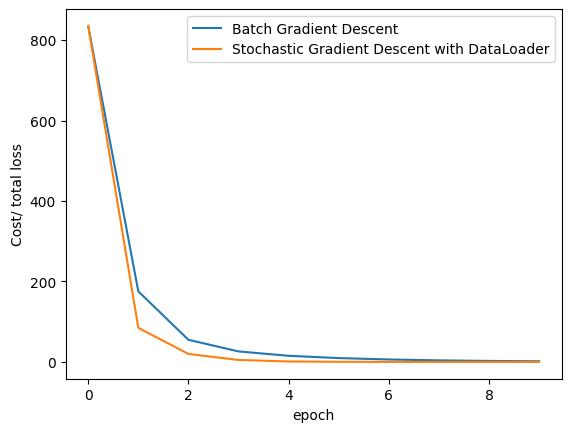

In [39]:
# Plot out the Loss_BGD and Loss_SGD
LOSS_BGD = [loss.detach().numpy() for loss in Loss_BGD]
plt.plot(LOSS_BGD,label = "Batch Gradient Descent")
plt.plot(Loss_SGD,label = "Stochastic Gradient Descent")
plt.xlabel('epoch')
plt.ylabel('Cost/ total loss')
plt.legend()
plt.show()

# Plot the LOSS_BGD and LOSS_Loader
plt.plot(LOSS_BGD,label="Batch Gradient Descent")
plt.plot(LOSS_Loader,label="Stochastic Gradient Descent with DataLoader")
plt.xlabel('epoch')
plt.ylabel('Cost/ total loss')
plt.legend()
plt.show()

In [44]:
# SGD with trainloader to train model and store the total loss in LOSS

LOSS = []
w = torch.tensor(-12.0, requires_grad = True)
b = torch.tensor(-10.0, requires_grad = True)

def train_model_SGD(epochs):
    for epoch in range(epochs):
        for x, y in trainloader:
            yhat = forward(x)
            loss = criterion(yhat, y)
            # Section for plotting
            get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), loss.tolist())
            loss.backward()
            w.data = w.data - lr * w.grad.data
            b.data = b.data - lr * b.grad.data
            w.grad.data.zero_()
            b.grad.data.zero_()
            LOSS.append(loss.item())
    get_surface.plot_ps()


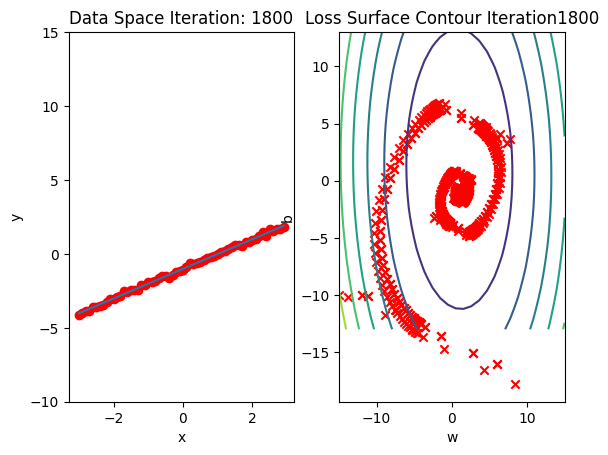

In [45]:
train_model_SGD(10)


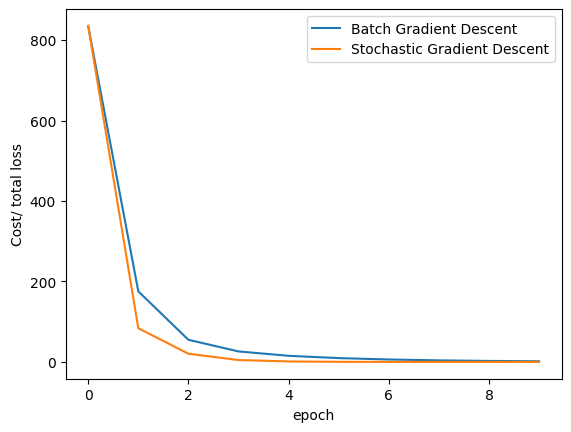

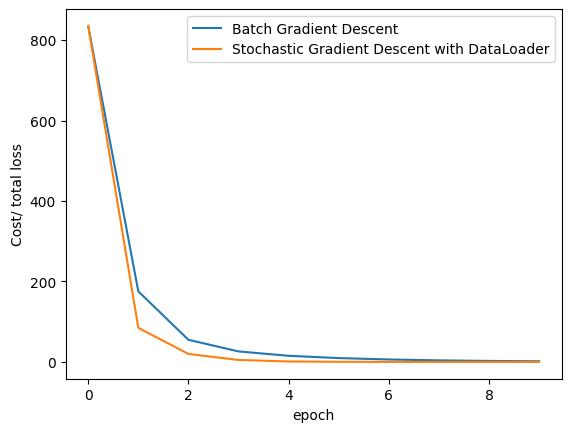

In [46]:
# Plot out the Loss_BGD and Loss_SGD
LOSS_BGD = [loss.detach().numpy() for loss in Loss_BGD]
plt.plot(LOSS_BGD,label = "Batch Gradient Descent")
plt.plot(Loss_SGD,label = "Stochastic Gradient Descent")
plt.xlabel('epoch')
plt.ylabel('Cost/ total loss')
plt.legend()
plt.show()

# Plot the LOSS_BGD and LOSS_Loader
plt.plot(LOSS_BGD,label="Batch Gradient Descent")
plt.plot(LOSS_Loader,label="Stochastic Gradient Descent with DataLoader")
plt.xlabel('epoch')
plt.ylabel('Cost/ total loss')
plt.legend()
plt.show()

